# 🛡 Support Vector Machines — Simplified & Practical

Support Vector Machines (SVMs) are powerful tools for classification and regression that aim to find the optimal decision boundary (hyperplane) between classes. They work well even in complex feature spaces using kernels.

In this notebook, we'll explore:
- Linear SVM for straightforward classification
- Nonlinear SVMs with kernels (Polynomial and RBF)
- Support Vector Regression (SVR)
- Under-the-hood concepts

Let's get started!

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Set style for plots
plt.style.use('ggplot')

# To ensure reproducibility
np.random.seed(42)

## 1. Linear SVM Classification

We generate some synthetic data for binary classification and fit a linear SVM.

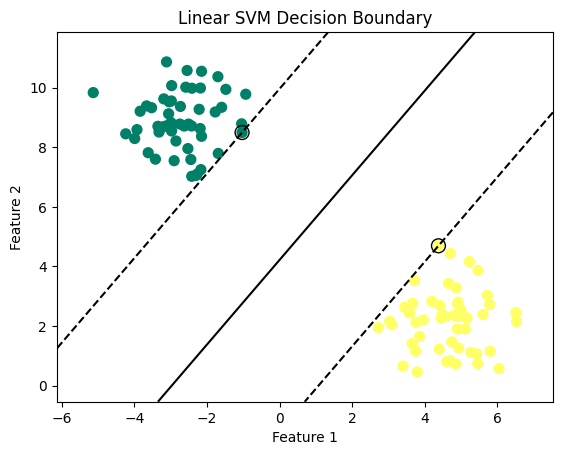

In [5]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC, SVR
import numpy as np
import matplotlib.pyplot as plt

# Generate two classes of synthetic data
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Fit a linear SVM with regularization parameter C=1
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X, y)

# Function to plot decision boundary, margins, and support vectors
def plot_svc_decision_boundary(model, X, y):
    # Create a grid to evaluate model
    xs = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 200)
    ys = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 200)
    xx, yy = np.meshgrid(xs, ys)
    
    # Compute decision function over grid
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"], colors="k")
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer", s=50)
    
    # Highlight support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Linear SVM Decision Boundary")
    plt.show()

# Plot the decision boundary
plot_svc_decision_boundary(svm_clf, X, y)

▶️ The dashed lines at `±1` are the margins, and the hollow circles are the support vectors that define the boundary.

## 2. Nonlinear SVM Classification with Kernels

To classify data that's not linearly separable, SVMs use kernels to implicitly map data into higher-dimensional spaces.

### A. Polynomial Kernel

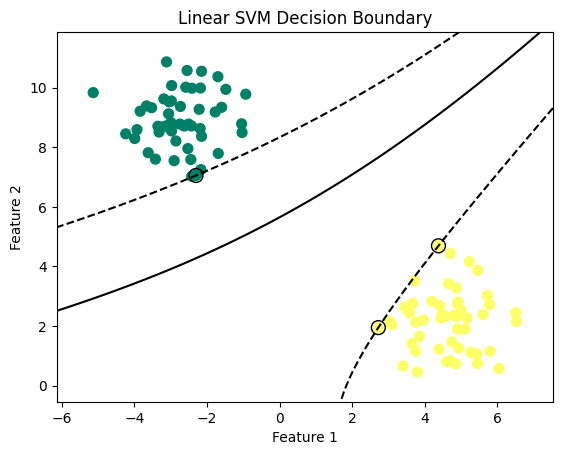

In [6]:
# Fit an SVM with polynomial kernel
poly_svm = SVC(kernel="poly", degree=3, coef0=1, C=5)
poly_svm.fit(X, y)

# Plot decision boundary
plot_svc_decision_boundary(poly_svm, X, y)

### B. Gaussian RBF Kernel

The RBF kernel maps data into an infinite-dimensional space, enabling highly flexible decision boundaries.

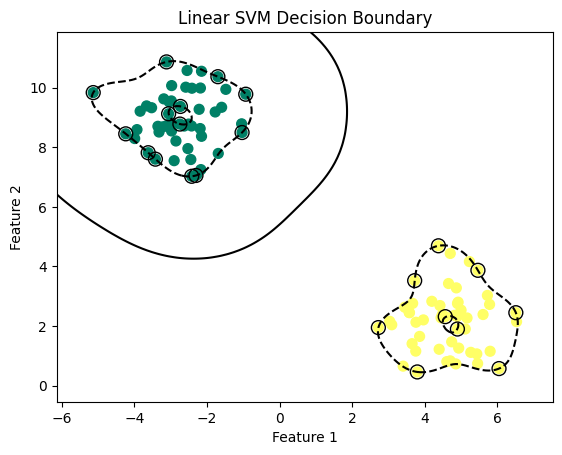

In [7]:
# Fit an SVM with RBF kernel
rbf_svm = SVC(kernel="rbf", gamma=0.5, C=5)
rbf_svm.fit(X, y)

# Plot decision boundary
plot_svc_decision_boundary(rbf_svm, X, y)

⚠️ Note: As datasets grow larger, training SVMs can become computationally intensive due to quadratic or worse complexity.

## 3. Support Vector Regression (SVR)

SVM concepts extend to regression tasks. Here, the model tries to fit data within an `ε`-insensitive tube.

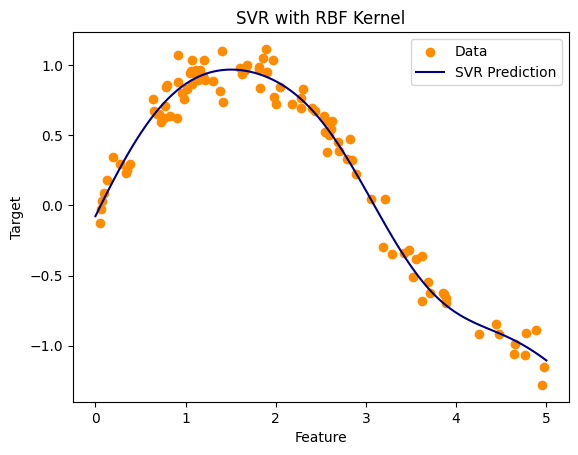

In [10]:
# Generate synthetic 1D regression data
X1D = np.sort(5 * np.random.rand(100, 1), axis=0)
y1D = np.sin(X1D).ravel() + np.random.randn(100) * 0.1  # Sine wave with noise

# Fit SVR with RBF kernel
svr_rbf = SVR(kernel="rbf", C=100, epsilon=0.1)
svr_rbf.fit(X1D, y1D)

# Predict over a range for visualization
X_test = np.linspace(0, 5, 100).reshape(100, 1)
y_pred = svr_rbf.predict(X_test)

# Plot data and regression line
plt.scatter(X1D, y1D, color="darkorange", label="Data")
plt.plot(X_test, y_pred, color="navy", label="SVR Prediction")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("SVR with RBF Kernel")
plt.legend()
plt.show()

## 4. Under the Hood of SVMs

- **Decision Function**: Computes the distance of a point to the decision boundary.
- **Support Vectors**: Data points that lie closest to the boundary; they define the hyperplane.
- **Optimization**: SVM training solves a quadratic programming (QP) problem to maximize the margin.
- **Kernels**: Implicitly map data into higher dimensions, enabling complex decision boundaries.

Let's look at some examples:

In [11]:
# Show decision function values for first 5 points
print("Decision function values:")
print(svm_clf.decision_function(X[:5]))

# Predicted classes for first 5 points
print("Predictions:")
print(svm_clf.predict(X[:5]))

Decision function values:
[-1.54225302  1.62361186 -1.61001798  1.41227814  1.36776212]
Predictions:
[0 1 0 1 1]


### Summary
- SVMs find the optimal margin hyperplane using support vectors.
- Kernels allow SVMs to handle nonlinear data.
- SVR applies the SVM principles to regression problems.
- They are powerful but can be computationally intensive for large datasets.
- Understanding the underlying optimization helps in tuning and interpreting models.